## <b> <span style='color:#e61227'>|</span> Brain Tumor Detection With YOLOv8 </b> 

![](https://pub.mdpi-res.com/diagnostics/diagnostics-11-01856/article_deploy/html/images/diagnostics-11-01856-g002.png?1633696527)

## <b>1 <span style='color:#e61227'>|</span> Introduction</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>1.1 |</span></b> YOLOv8 and Object Detection Task </b></p>
</div>

**YOLO (You Only Look Once)** is a popular family of **object detection** models known for their speed and accuracy. **YOLOv8**, the latest version, improves upon its predecessors with enhanced architecture and performance. **Object detection** involves identifying and localizing objects within images, making it crucial for applications like medical imaging, where precise localization of anomalies, such as brain tumors, is essential!!


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>1.2 |</span></b> Study Aim </b></p>
</div>

The primary objective of this work is to develop a robust and accurate model for detecting brain tumors from **MRI images** using the **YOLOv8 algorithm**. By training on a custom dataset, the model aims to assist in early diagnosis and treatment planning, ultimately improving patient outcomes!

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.3 |</span></b> Future Work (Tumor Segmentation) </b></p>
</div>

While this project focuses on detecting tumors, future work will involve segmenting the tumors to delineate their exact boundaries within the **MRI images**. **Tumor segmentation** is a more granular task that provides detailed information about the size, shape, and location of the tumors, which is critical for treatment planning and monitoring disease progression.


## <b>2 <span style='color:#e61227'>|</span> Install And Import Essential Libreries</b> 

In [1]:
# Install Essential Libraries
!pip install ultralytics
from IPython import display
display.clear_output()

In [2]:
# Import Essential Libraries
import os
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## <b>3 <span style='color:#e61227'>|</span> Loading YOLOv8 Pre-trained Model </b> 


In [3]:
# Load a pretrained YOLOv8n model from Ultralytics
T_Model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 123MB/s]


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>3.1 |</span></b> Train and Fine-tuning YOLOv8 and Important Hyperparameters </b></p>
</div>

### Fine-tuning the YOLOv8 model involves adjusting various hyperparameters to optimize performance for the specific task of brain tumor detection. Key hyperparameters include:

- Learning Rate: Controls the step size during optimization. A lower learning rate ensures slower, more stable updates.
- Batch Size: Number of images processed in one iteration. Affects memory usage and convergence speed.
- Epochs: Number of complete passes through the training dataset.
- Optimizer: Algorithm used to minimize the loss function. Choices include SGD, Adam, and others.
- Patience: Number of epochs with no improvement after which training is stopped early.

### Train Model

- Training the model involves feeding the custom dataset into the YOLOv8 algorithm, allowing it to learn to identify and localize tumors in MRI images. This process is iterative, with the model refining its predictions over multiple epochs.

In [4]:
# Define the dataset_path
yaml_file_path = '/kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/data.yaml'

# Train the model on our custom dataset
results = T_Model.train( data= yaml_file_path,epochs=50,patience=20, batch= -1, optimizer='auto')

Ultralytics YOLOv8.2.58 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/data.yaml, epochs=50, time=None, patience=20, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

100%|██████████| 755k/755k [00:00<00:00, 21.0MB/s]
2024-07-17 20:03:09,465	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-17 20:03:10,295	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.23G reserved, 0.07G allocated, 14.45G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3011433       8.196         0.315          29.8         98.21        (1, 3, 640, 640)                    list
     3011433       16.39         0.298         17.82         47.82        (2, 3, 640, 640)                    list
     3011433       32.79         0.533         18.35         49.97        (4, 3, 640, 640)                    list
     3011433       65.57         1.063         28.14         55.22        (8, 3, 640, 640)                    list
     3011433       131.1         2.005         47.64         70.96       (16, 3, 640, 640)                    list
Aut

train: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels... 6930 images, 79 backgrounds, 0 corrupt: 100%|██████████| 6930/6930 [00:28<00:00, 244.65it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid/labels... 1980 images, 17 backgrounds, 0 corrupt: 100%|██████████| 1980/1980 [00:08<00:00, 246.82it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005625000000000001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.55G      1.802      2.986      1.912         84        640: 100%|██████████| 97/97 [01:07<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.12it/s]


                   all       1980       4380      0.278      0.273      0.238     0.0931

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.52G      1.709      2.243      1.823         82        640: 100%|██████████| 97/97 [01:04<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]


                   all       1980       4380      0.341      0.268      0.233     0.0895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.53G      1.748      2.054      1.842         64        640: 100%|██████████| 97/97 [01:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:13<00:00,  1.04it/s]


                   all       1980       4380      0.219      0.243       0.15     0.0489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.52G      1.746      1.931      1.828         83        640: 100%|██████████| 97/97 [01:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]


                   all       1980       4380      0.466      0.332      0.337      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       9.5G        1.7      1.809      1.798         71        640: 100%|██████████| 97/97 [01:05<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]


                   all       1980       4380       0.49      0.366      0.355       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.51G      1.669      1.719      1.777         71        640: 100%|██████████| 97/97 [01:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]


                   all       1980       4380      0.687      0.508      0.543      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.49G      1.644      1.648      1.761         80        640: 100%|██████████| 97/97 [01:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.669      0.504      0.543      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.49G      1.622      1.595      1.752         79        640: 100%|██████████| 97/97 [01:04<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.27it/s]

                   all       1980       4380      0.725      0.521      0.578      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       9.5G      1.598      1.541      1.728         69        640: 100%|██████████| 97/97 [01:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]


                   all       1980       4380      0.664      0.516       0.56      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       9.5G       1.59      1.518      1.721         77        640: 100%|██████████| 97/97 [01:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.29it/s]

                   all       1980       4380      0.684      0.457      0.516      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.51G      1.564      1.488      1.699         54        640: 100%|██████████| 97/97 [01:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]


                   all       1980       4380      0.708      0.508      0.566      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.53G      1.557       1.45      1.699         71        640: 100%|██████████| 97/97 [01:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]


                   all       1980       4380      0.712      0.509      0.571       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.53G      1.535        1.4      1.675         73        640: 100%|██████████| 97/97 [01:04<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.27it/s]

                   all       1980       4380      0.745      0.541       0.61      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.49G      1.527      1.384      1.672         73        640: 100%|██████████| 97/97 [01:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.741      0.568      0.619      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.47G      1.514      1.356      1.663         61        640: 100%|██████████| 97/97 [01:04<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380      0.738      0.572      0.633      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.52G      1.498       1.35       1.64         53        640: 100%|██████████| 97/97 [01:05<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.757      0.575      0.645      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.51G      1.493      1.313      1.635         82        640: 100%|██████████| 97/97 [01:05<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]


                   all       1980       4380       0.75       0.58      0.644      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.51G      1.482      1.298      1.625         65        640: 100%|██████████| 97/97 [01:04<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.783      0.622      0.679      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.49G      1.479      1.291       1.62         63        640: 100%|██████████| 97/97 [01:05<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380       0.76      0.591      0.654       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.52G      1.462      1.252      1.604         69        640: 100%|██████████| 97/97 [01:05<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.791      0.621       0.68      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.52G      1.434      1.224      1.589         73        640: 100%|██████████| 97/97 [01:05<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.791      0.611       0.68      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.47G      1.441      1.233      1.595         76        640: 100%|██████████| 97/97 [01:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.29it/s]

                   all       1980       4380      0.804      0.589      0.671      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.52G      1.431      1.211      1.586         56        640: 100%|██████████| 97/97 [01:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.818      0.598       0.68      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.49G      1.418      1.194      1.575         87        640: 100%|██████████| 97/97 [01:04<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.28it/s]

                   all       1980       4380      0.812      0.617      0.693      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.52G      1.412      1.184      1.575         52        640: 100%|██████████| 97/97 [01:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.803       0.63      0.698      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       9.5G      1.392      1.163      1.562         51        640: 100%|██████████| 97/97 [01:04<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.27it/s]

                   all       1980       4380      0.797      0.628      0.699      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.49G      1.378      1.139      1.544        100        640: 100%|██████████| 97/97 [01:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.29it/s]

                   all       1980       4380      0.831      0.628      0.706      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       9.5G      1.367      1.117      1.537         51        640: 100%|██████████| 97/97 [01:04<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.13it/s]

                   all       1980       4380      0.835      0.626      0.706        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.52G      1.355      1.102      1.523         53        640: 100%|██████████| 97/97 [01:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.831      0.636      0.715      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.52G      1.356      1.093      1.525         49        640: 100%|██████████| 97/97 [01:04<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.812      0.639      0.709      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.52G      1.344      1.084      1.517         61        640: 100%|██████████| 97/97 [01:04<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.27it/s]

                   all       1980       4380      0.833      0.641      0.719      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.51G      1.329      1.078      1.504         58        640: 100%|██████████| 97/97 [01:05<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.28it/s]

                   all       1980       4380      0.821      0.656      0.728      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.49G      1.321      1.061      1.504         66        640: 100%|██████████| 97/97 [01:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.835      0.652      0.729      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.47G      1.311      1.044      1.492         61        640: 100%|██████████| 97/97 [01:04<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.844      0.653      0.736      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.47G      1.306      1.042      1.493         50        640: 100%|██████████| 97/97 [01:04<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380      0.849      0.652      0.735      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       9.5G      1.287      1.022      1.478         77        640: 100%|██████████| 97/97 [01:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.29it/s]

                   all       1980       4380      0.841      0.675      0.743      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       9.5G      1.277      1.016      1.473         82        640: 100%|██████████| 97/97 [01:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.854      0.662      0.742      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       9.5G      1.273     0.9978      1.471         74        640: 100%|██████████| 97/97 [01:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.27it/s]

                   all       1980       4380      0.847      0.665      0.742      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       9.5G      1.265     0.9973      1.453         46        640: 100%|██████████| 97/97 [01:04<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.28it/s]

                   all       1980       4380      0.852      0.672       0.75      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.47G      1.252     0.9789      1.439         69        640: 100%|██████████| 97/97 [01:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.843      0.673      0.752      0.453


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.34G      1.242     0.9003      1.531         41        640: 100%|██████████| 97/97 [01:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.28it/s]

                   all       1980       4380      0.868      0.664      0.753      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.34G      1.202     0.8614      1.498         33        640: 100%|██████████| 97/97 [01:00<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.29it/s]

                   all       1980       4380      0.861      0.681       0.76      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.34G      1.182     0.8399      1.481         47        640: 100%|██████████| 97/97 [01:00<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380      0.864      0.687      0.763      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.34G      1.181     0.8313      1.487         43        640: 100%|██████████| 97/97 [01:00<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.29it/s]

                   all       1980       4380      0.868      0.679      0.764      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.34G      1.158     0.8161      1.465         42        640: 100%|██████████| 97/97 [01:00<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.27it/s]

                   all       1980       4380      0.866      0.688      0.764      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.34G      1.145     0.8057      1.461         46        640: 100%|██████████| 97/97 [01:00<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.28it/s]

                   all       1980       4380      0.862      0.694      0.768      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.34G      1.131     0.8003      1.449         38        640: 100%|██████████| 97/97 [01:00<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.29it/s]

                   all       1980       4380      0.872      0.694      0.771      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.34G      1.121     0.7895      1.437         36        640: 100%|██████████| 97/97 [01:00<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.30it/s]

                   all       1980       4380      0.863      0.694       0.77      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.34G      1.111     0.7741      1.429         40        640: 100%|██████████| 97/97 [01:00<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.851      0.704      0.773      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.34G      1.098     0.7697      1.424         43        640: 100%|██████████| 97/97 [01:00<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380      0.866      0.692      0.771      0.489



50 epochs completed in 1.061 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.58 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:14<00:00,  1.06s/it]


                   all       1980       4380      0.866      0.692      0.771      0.489
                label0       1246       1246       0.82      0.613      0.703      0.403
                label1       1944       1944      0.898      0.796      0.855      0.596
                label2       1190       1190       0.88      0.667      0.754      0.469
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


## <b>4 <span style='color:#e61227'>|</span> Model Performance Evaluation</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>4.1 |</span></b> Important Metrics for YOLOv8 </b></p>
</div>

Evaluating the model involves measuring its performance on a validation set. Key metrics include **precision**, **recall**, and **mean Average Precision (mAP)**, which collectively provide a comprehensive view of the models accuracy and reliability.

- Precision: Ratio of correctly predicted positive observations to total predicted positives. High precision indicates fewer false positives.
- Recall: Ratio of correctly predicted positive observations to all actual positives. High recall indicates fewer false negatives.
- mAP50: Mean Average Precision at 50% IoU. Measures accuracy at a single IoU threshold.
- mAP50-95: Mean Average Precision across multiple IoU thresholds, providing a more comprehensive measure of performance.
- IoU (Intersection Over Union): Measures overlap between predicted and ground truth bounding boxes.

In [5]:
# Define the path to the directory
post_training_files_path = '/kaggle/working/runs/detect/train/'

# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='val')

Ultralytics YOLOv8.2.58 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid/labels... 1980 images, 17 backgrounds, 0 corrupt: 100%|██████████| 1980/1980 [00:02<00:00, 835.72it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [00:17<00:00,  7.17it/s]


                   all       1980       4380      0.867      0.691      0.771      0.489
                label0       1246       1246      0.822      0.611      0.703      0.403
                label1       1944       1944      0.899      0.795      0.855      0.596
                label2       1190       1190       0.88      0.666      0.754      0.469
Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val


In [6]:

# Convert the dictionary to a pandas DataFrame and use the keys as the index
metrics = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>4.2 |</span></b> Visualization Results </b></p>
</div>

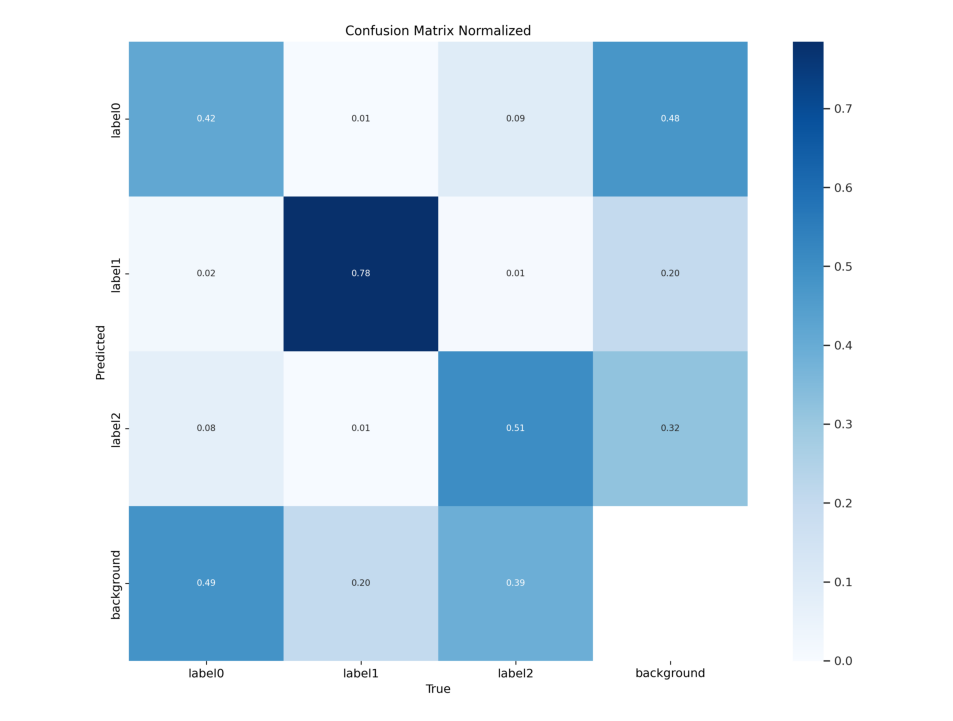

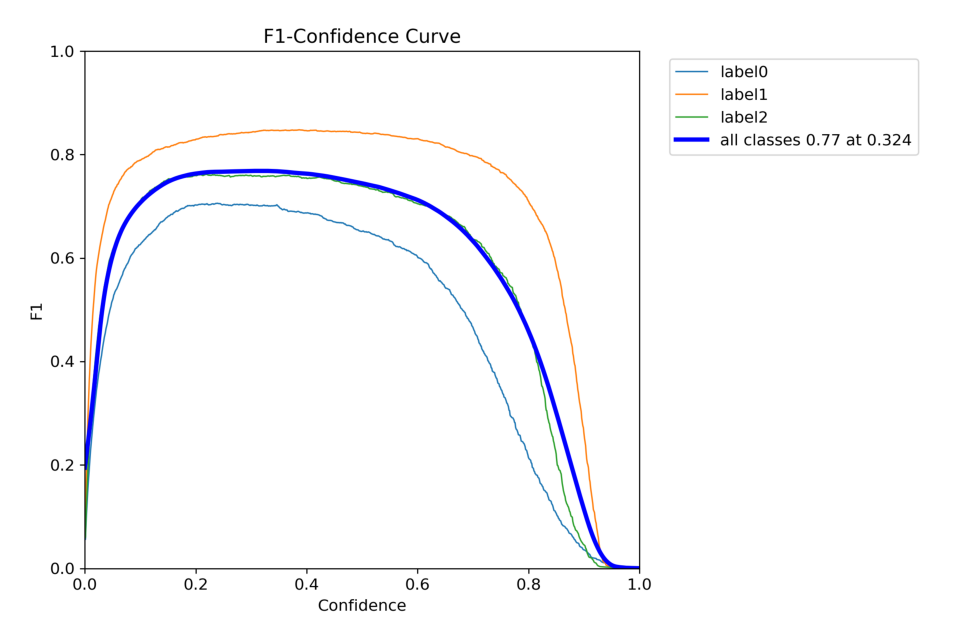

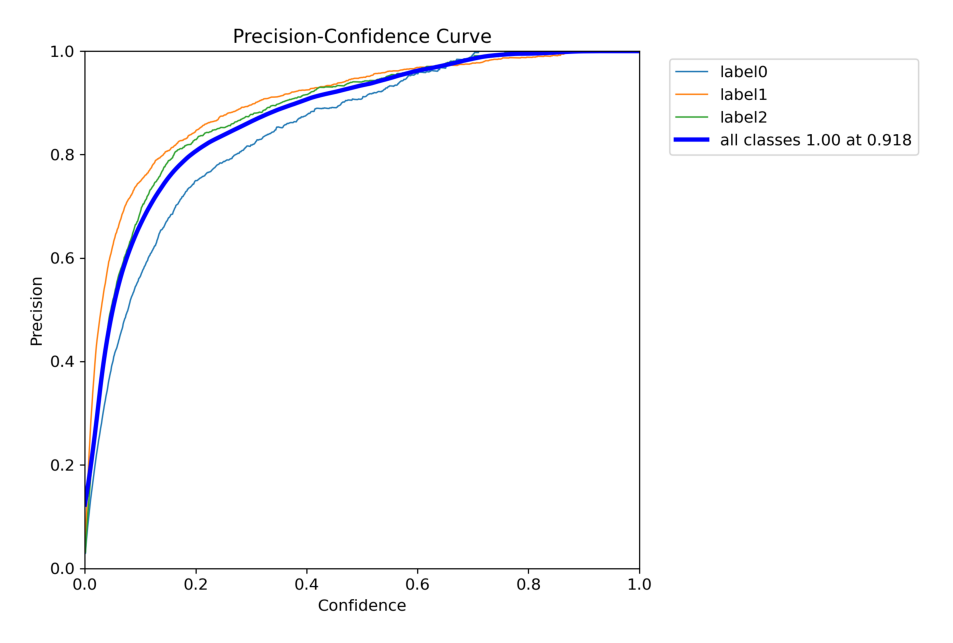

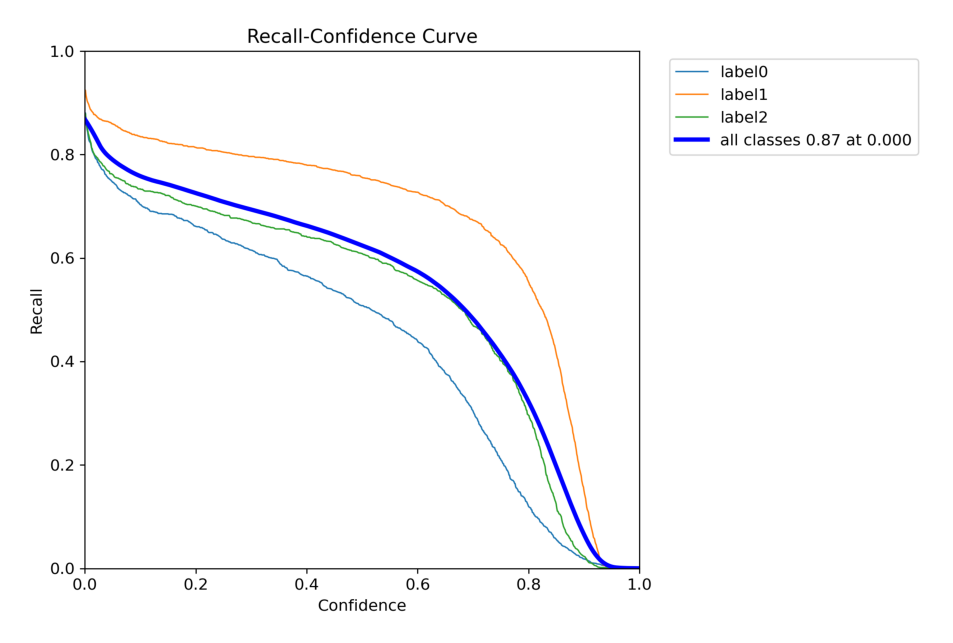

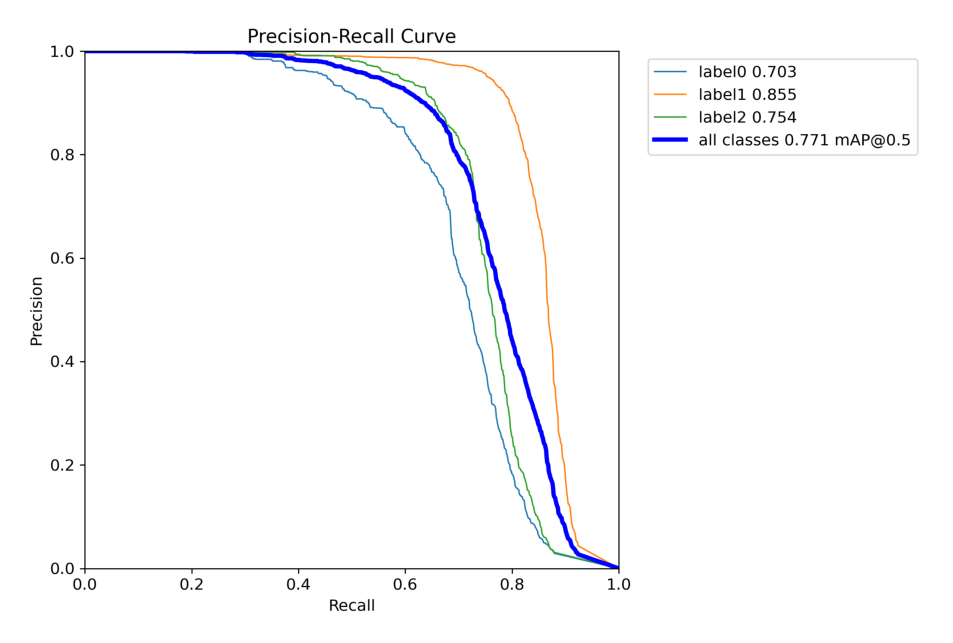

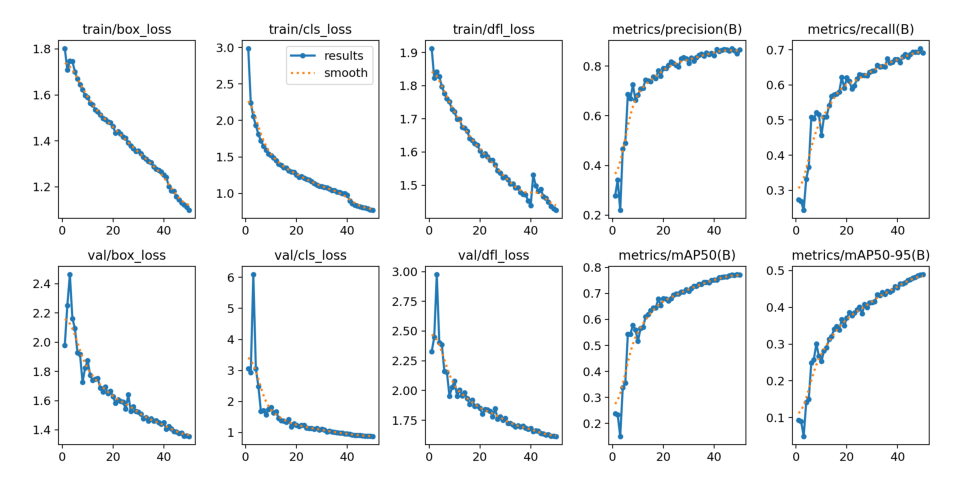

In [7]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#9b63b8'}, style='darkgrid')

def display_images(post_training_files_path, image_files):
    
    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/kaggle/working/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>4.3 |</span></b> Inference Model on Unseen Images </b></p>
</div>


0: 640x640 1 label0, 1 label1, 7.3ms
Speed: 1.7ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 label0, 1 label1, 7.3ms
Speed: 1.9ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 label1, 1 label2, 7.4ms
Speed: 2.1ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.5ms
Speed: 2.1ms preprocess, 7.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 label0, 1 label1, 1 label2, 7.4ms
Speed: 2.2ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 label0, 1 label1, 1 label2, 7.5ms
Speed: 2.2ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 label1, 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 label1, 7.3ms
Speed: 1.6ms preprocess, 7.

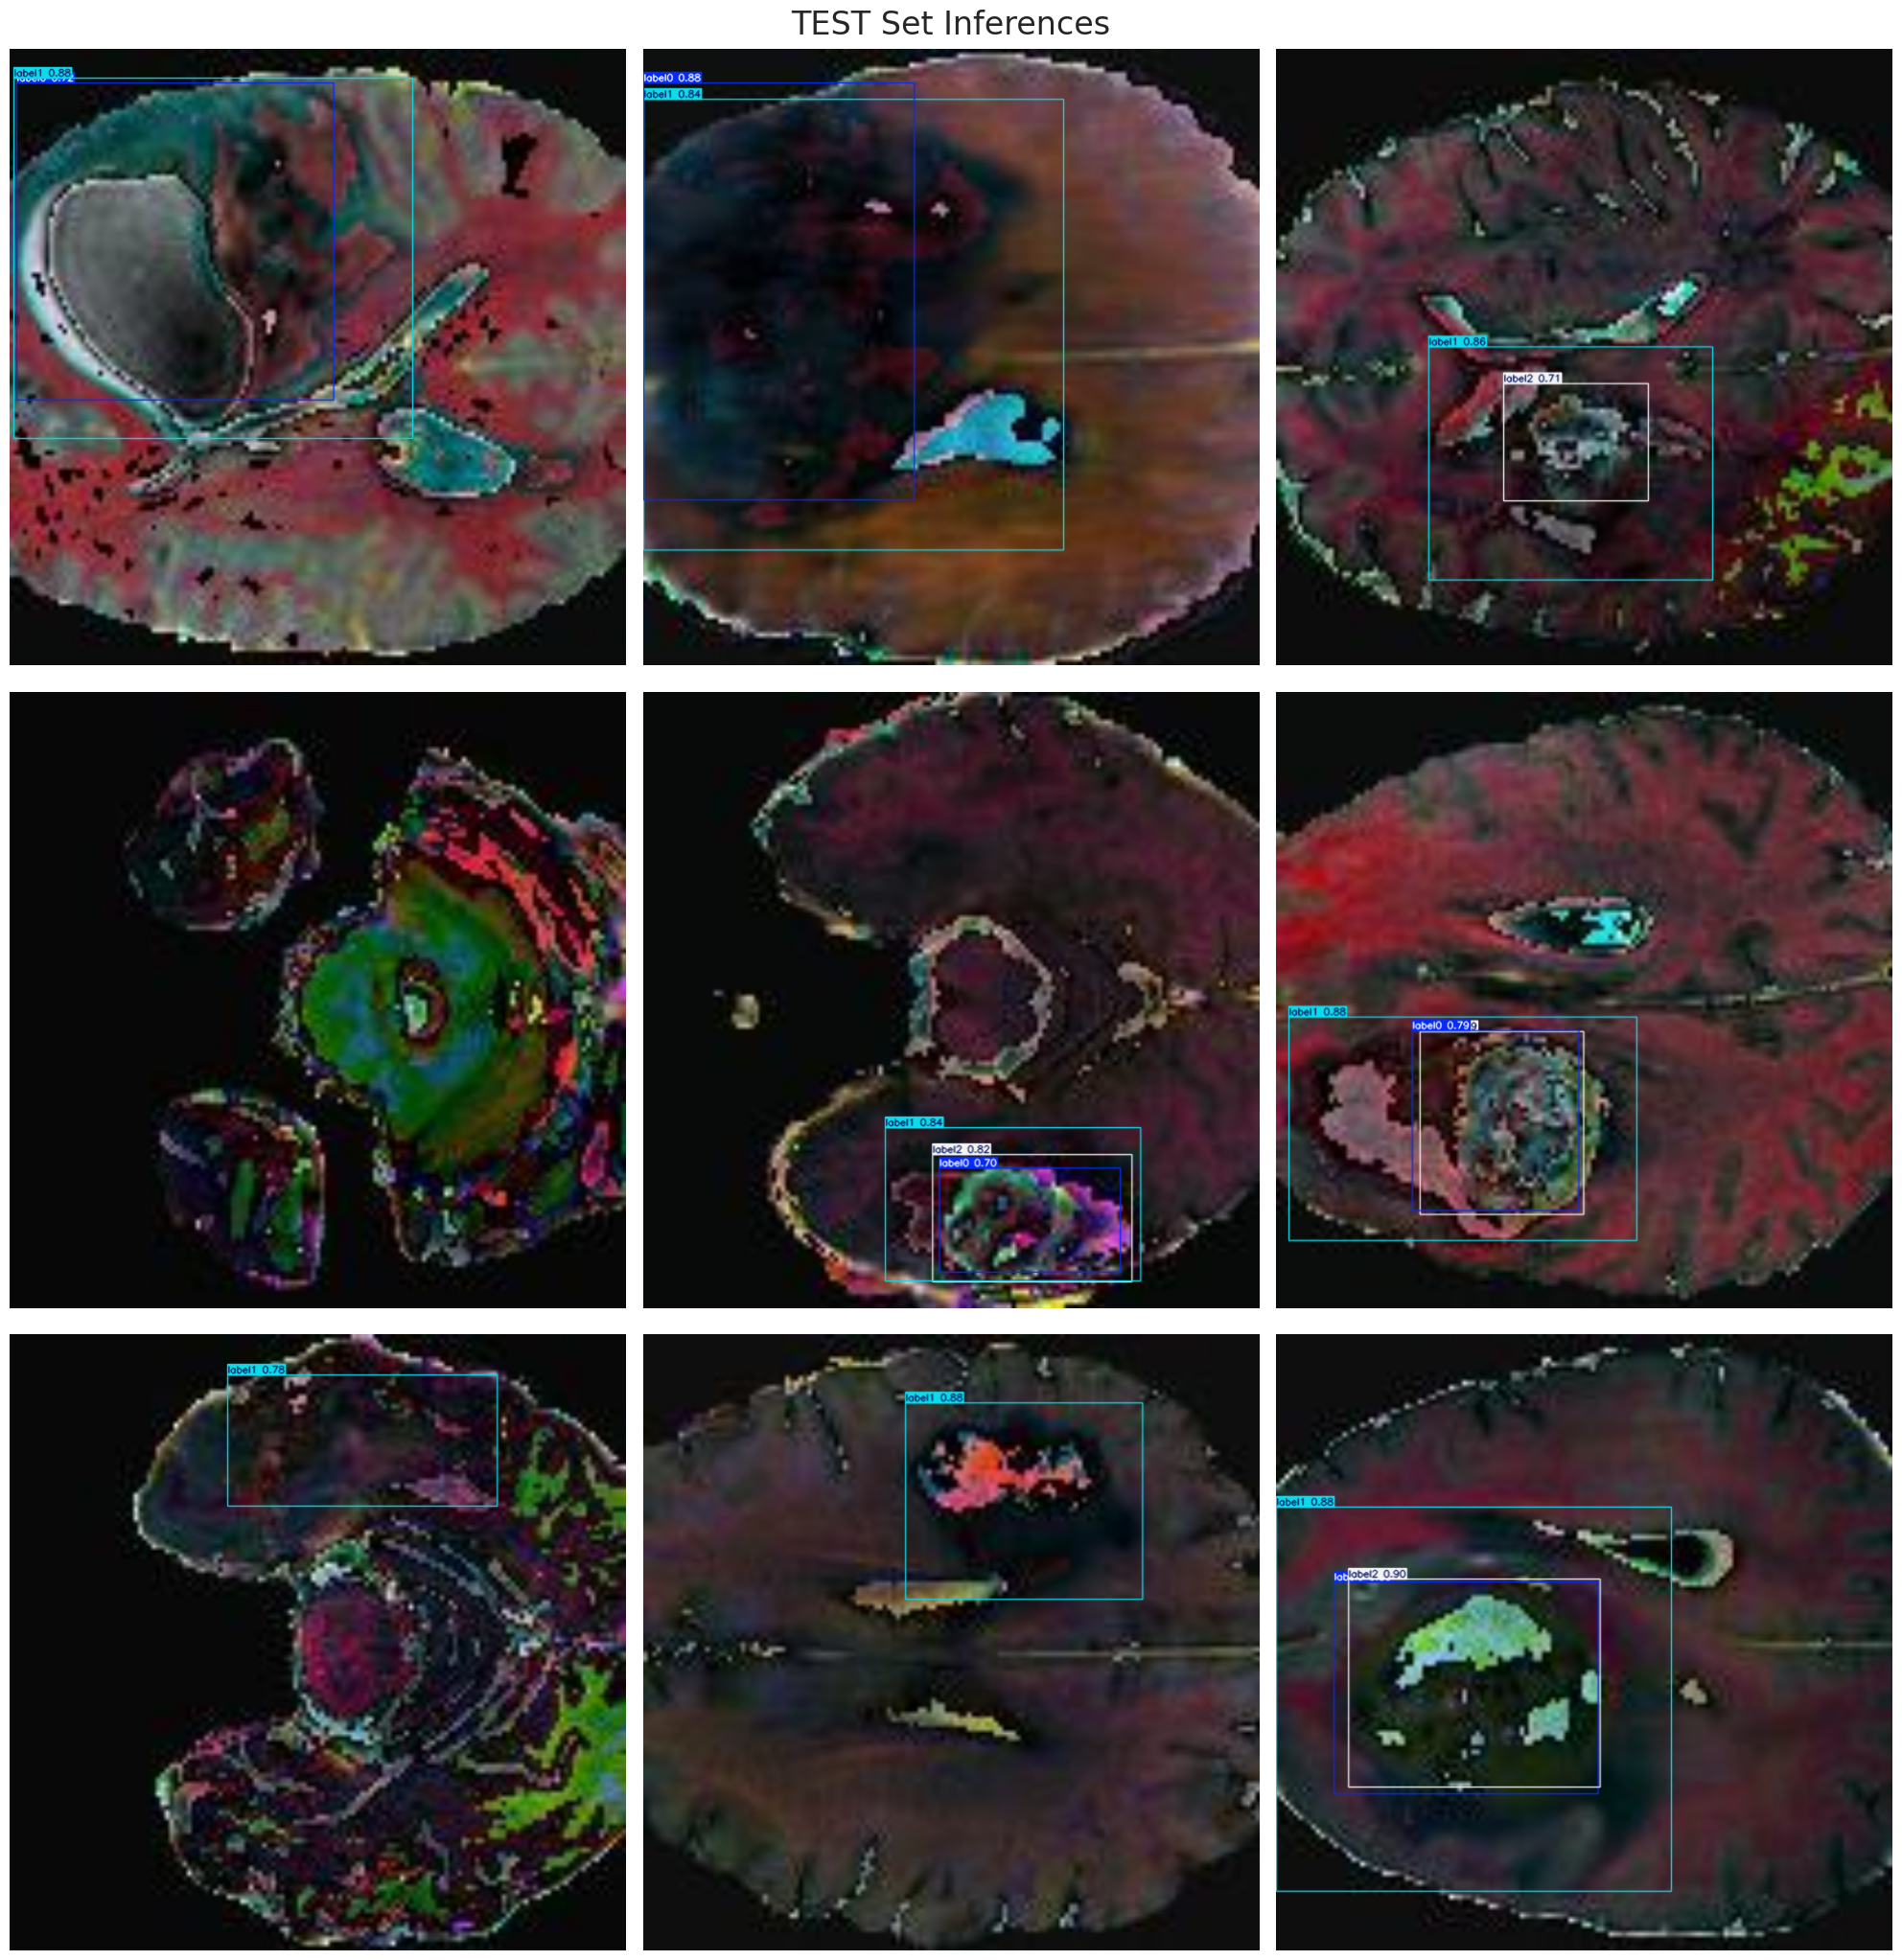

In [8]:
# Validation of Model by TestSet

# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('TEST Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            
            # Load image
            image = cv2.imread(image_path)
            
            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)
                
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                # Predict with the model
                results = best_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()
